In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)

In [26]:
base_result = pd.read_csv("result/Baseline_result.csv")
mc_result = pd.read_csv("result/MC_result.csv")

In [27]:
# 데이터 병합
df = base_result.copy()
df['MC_Pred'] = mc_result['Pred']

In [28]:
# 확률 -> 이진 분류로 변환
df["Base_bin"] = (df.Pred > 0.5).astype(int)
df["MC_bin"] = (df.MC_Pred > 0.5).astype(int)

In [29]:
# 모델 분류 성능 요약
def compute_metrics(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }
    return metrics

baseline_metrics = compute_metrics(df['True'], df['Base_bin'])
mc_metrics = compute_metrics(df['True'], df['MC_bin'])

# 결과를 DataFrame으로
metrics_df = pd.DataFrame([baseline_metrics, mc_metrics], index=['Baseline','MC Dropout']).round(4)
print(metrics_df)

            Accuracy  Precision  Recall  F1-score
Baseline      0.9394     0.9322  0.9538    0.9429
MC Dropout    0.9545     0.9389  0.9769    0.9575


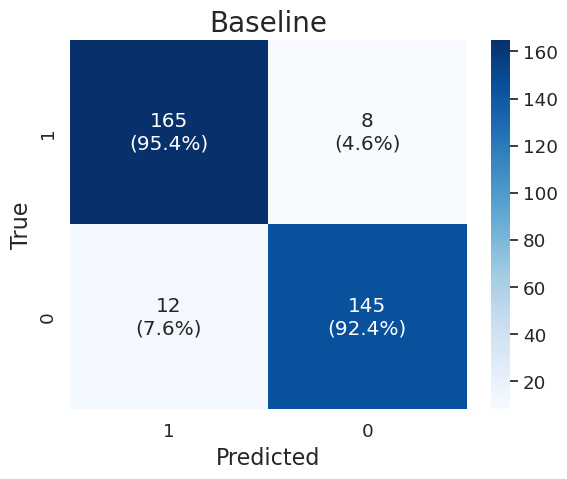

In [35]:
# Baseline 모델 혼동행렬
cm = confusion_matrix(df['True'], df['Base_bin'], labels = [1, 0])
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# 정수값 + 비율 표시
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i,j]}\n({cm_norm[i,j]*100:.1f}%)"

ax = plt.subplot()
sns.set(font_scale=1.2) # Adjust to fit
sns.heatmap(cm,
            annot=annot,
            fmt='',
            cmap='Blues')

plt.title("Baseline", fontsize = 20)
plt.xlabel("Predicted", fontsize = 16)
plt.ylabel("True", fontsize = 16)
plt.xticks([0.5,1.5],["1","0"])
plt.yticks([0.5,1.5],["1","0"])
plt.savefig("fig/confusion_Baseline.png", dpi = 300)

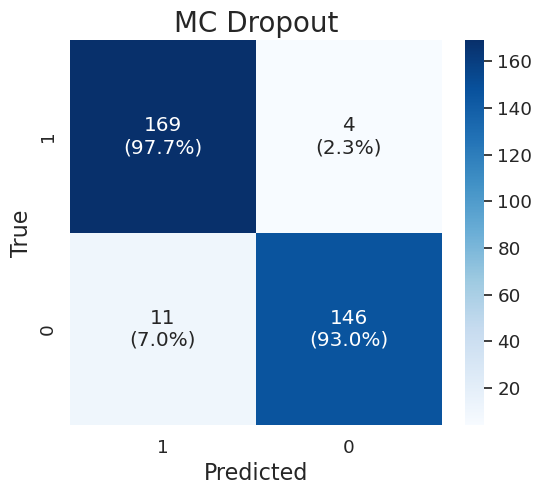

In [36]:
# MC Dropout 혼동행렬
cm = confusion_matrix(df['True'], df['MC_bin'], labels = [1, 0])
cm_norm = cm / cm.sum(axis=1, keepdims=True)

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i,j]}\n({cm_norm[i,j]*100:.1f}%)"

plt.figure(figsize=(6,5))
sns.set(font_scale=1.2) # Adjust to fit
sns.heatmap(cm,
            annot=annot,
            fmt='',
            cmap='Blues')

plt.title("MC Dropout", fontsize = 20)
plt.xlabel("Predicted", fontsize = 16)
plt.ylabel("True", fontsize = 16)
plt.xticks([0.5,1.5],["1","0"])
plt.yticks([0.5,1.5],["1","0"])
plt.savefig("fig/confusion_MC.png", dpi = 300)

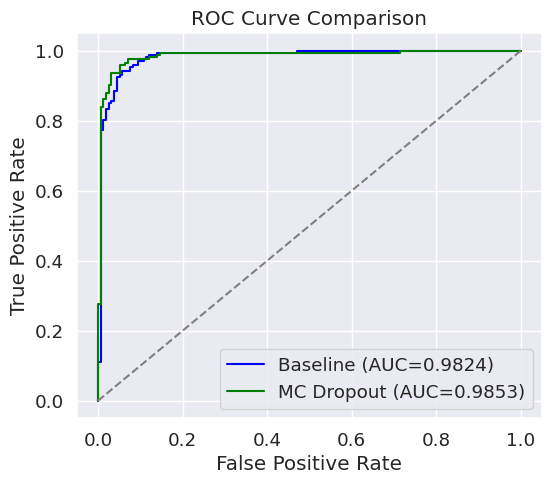

In [44]:
fpr_base, tpr_base, _ = roc_curve(df['True'], df['Pred'])
fpr_mc, tpr_mc, _ = roc_curve(df['True'], df['MC_Pred'])

auc_base = auc(fpr_base, tpr_base)
auc_mc = auc(fpr_mc, tpr_mc)

plt.figure(figsize=(6,5))
plt.plot(fpr_base, tpr_base, label=f'Baseline (AUC={auc_base:.4f})', color='blue')
plt.plot(fpr_mc, tpr_mc, label=f'MC Dropout (AUC={auc_mc:.4f})', color='green')
plt.plot([0,1],[0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.savefig("fig/ROC.png", dpi = 300)